In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset of the Project

In [2]:
df = pd.read_csv("h1b.csv")

In [3]:
df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [5]:
df.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [6]:
(df.isna()==True).sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

### Data Cleansing

In [10]:
# Fill missing values with median for numeric columns
df['PREVAILING_WAGE'].fillna(df['PREVAILING_WAGE'].median(), inplace=True)
median_year = df['YEAR'].median()
df['YEAR'].fillna(median_year, inplace=True)

# Fill missing values with mode for categorical columns
df['CASE_STATUS'].fillna(df['CASE_STATUS'].mode()[0], inplace=True)
df['EMPLOYER_NAME'].fillna(df['EMPLOYER_NAME'].mode()[0], inplace=True)
df['JOB_TITLE'].fillna(df['JOB_TITLE'].mode()[0], inplace=True)
df['FULL_TIME_POSITION'].fillna(df['FULL_TIME_POSITION'].mode()[0], inplace=True)
df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0],inplace=True)

In [11]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [12]:
df.tail()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002453,3002454,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002457,3002458,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"ALTANTA, GEORGIA",-84.387982,33.748995


### Analysis of the Dataset

#### Petition Distributed by case statuses

In [13]:
cs = df['CASE_STATUS'].value_counts()
cs

CERTIFIED                                             2615636
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

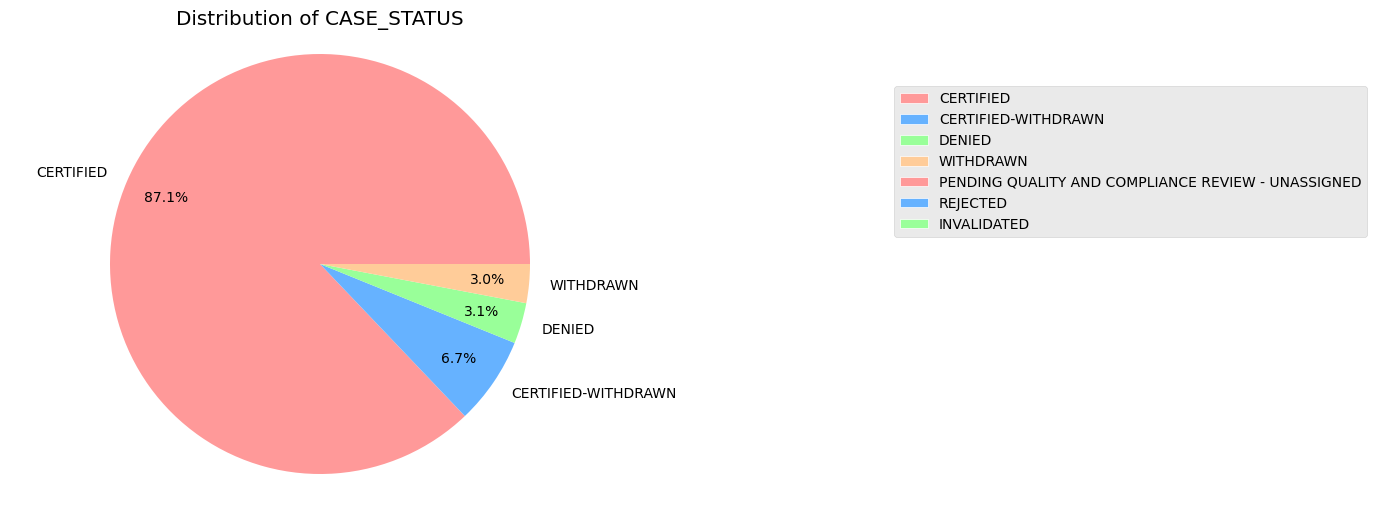

In [33]:
# Create the pie chart
plt.figure(figsize=(8, 6), dpi=100)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Define custom colors

# Plot the pie chart with customizations
percent=[v/sum(cs.values)*100 for v in cs.values]
c,_,_=plt.pie(x=percent[:4],labels=cs.index[:4],autopct='%.1f%%',colors= colors,pctdistance=0.8)
plt.title('Distribution of CASE_STATUS')

plt.axis('equal')  # Equal aspect ratio ensures a circular pie

# Adjust label positions
for wedge, text_label, autotext in zip(wedges, text_labels, autotexts):
    wedge.set_edgecolor('white')  # Add white border to pie slices
    text_label.set_bbox(dict(facecolor='white', edgecolor='white'))  # Set a white background for the labels
    autotext.set_color('black')  # Set the text color for percentage labels

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust legend position
plt.legend(wedges, cs.index, loc='upper right', bbox_to_anchor=(2.2, 0.9))

plt.show()

### Top employers filing for petition

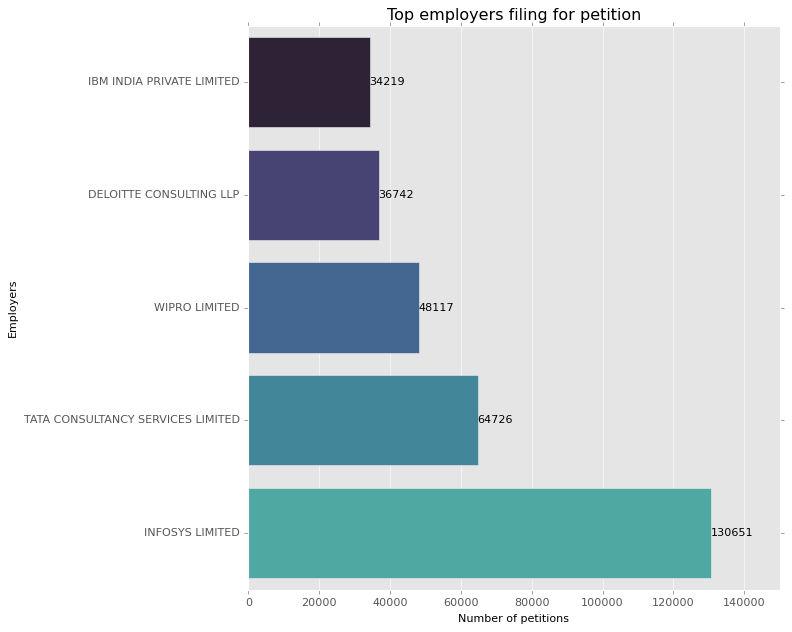

In [116]:
top_employers = df['EMPLOYER_NAME'].value_counts().head().sort_values(ascending=True)
plt.figure(figsize=(10,8))
barplot = sns.barplot(x=top_employers.values,y=top_employers.index,orient='h',palette=sns.color_palette('mako'))
plt.title("Top employers filing for petition")
plt.xlabel("Number of petitions")
plt.ylabel("Employers")
for i, v in enumerate(top_employers.values):
    barplot.annotate(str(v), xy=(v, i), xytext=(v + 10, i), color='black', va='center')
plt.xlim(right=max(top_companies.values) + 19349)
plt.tight_layout()
plt.show()

### Top 15 companies that filed the most visa application

In [107]:
top_companies = df['EMPLOYER_NAME'].value_counts().head(15)
top_companies

INFOSYS LIMITED                                    130651
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
LARSEN & TOUBRO INFOTECH LIMITED                    17457
CAPGEMINI AMERICA INC                               16725
GOOGLE INC.                                         16473
IBM CORPORATION                                     13276
IGATE TECHNOLOGIES INC.                             12564
Name: EMPLOYER_NAME, dtype: int64

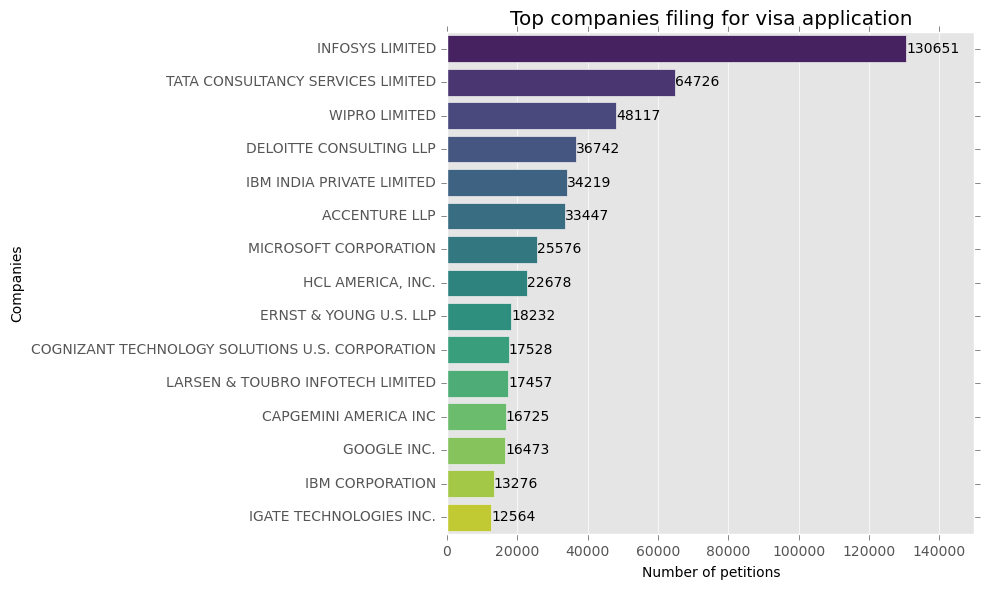

In [114]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6),dpi=100)
barplot = sns.barplot(x=top_companies.values,y=top_companies.index,orient='h',palette='viridis')
plt.title("Top companies filing for visa application")
plt.xlabel("Number of petitions")
plt.ylabel("Companies")


for i, v in enumerate(top_companies.values):
    barplot.annotate(str(v), xy=(v, i), xytext=(v + 10, i), color='black', va='center',ha='left')
plt.xlim(right=max(top_companies.values) + 19349)
plt.tight_layout()
plt.show()

### Top employers granting maximum prevailing wages

In [119]:
top_emp_max_wages = df[df['CASE_STATUS']=='CERTIFIED'].groupby('EMPLOYER_NAME').agg({'PREVAILING_WAGE':'max'}).nlargest(10,'PREVAILING_WAGE')
top_emp_max_wages

,PREVAILING_WAGE
EMPLOYER_NAME,
INTEGRATED MEDICAL SERVICES,306049120.0
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS,269274720.0
SHELBY HOSPITAL LCC,218395840.0
GOOGLE INC.,207277824.0
"SOAPROJECTS, INC",181232480.0
INFORMATION CONTROL CORPORATION,169507520.0
SARVIN,167171680.0
INFOSYS LIMITED,161634720.0
CONGRUENT SOLUTIONS INC.,159989440.0


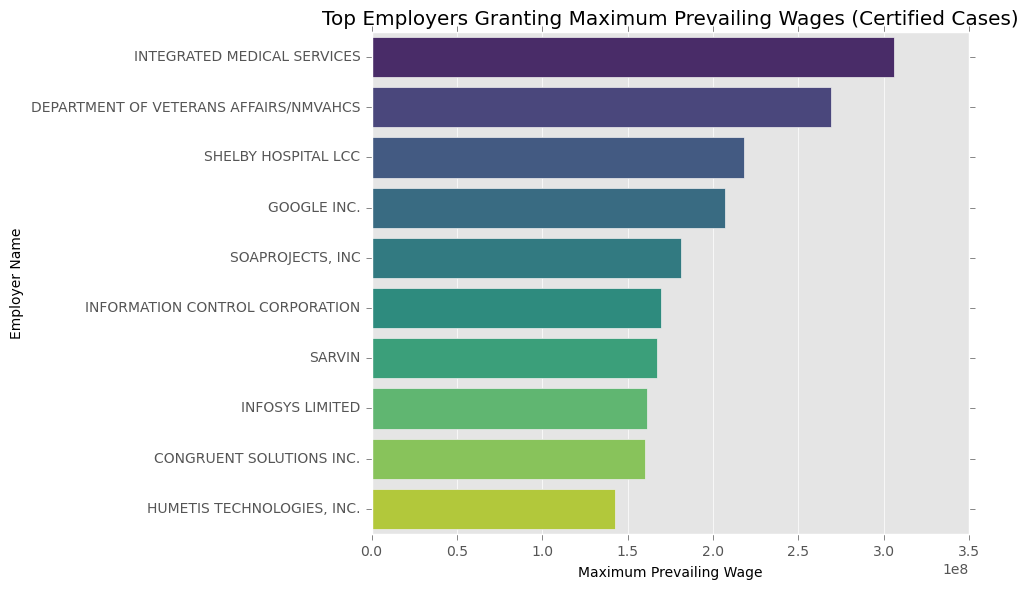

In [120]:
plt.figure(figsize=(10, 6), dpi=100)
barplot = sns.barplot(x=top_emp_max_wages['PREVAILING_WAGE'], y=top_emp_max_wages.index, orient='h', palette='viridis')
plt.title("Top Employers Granting Maximum Prevailing Wages (Certified Cases)")
plt.xlabel("Maximum Prevailing Wage")
plt.ylabel("Employer Name")
plt.tight_layout()
plt.show()

### Top 20 states filing highest visa petitions

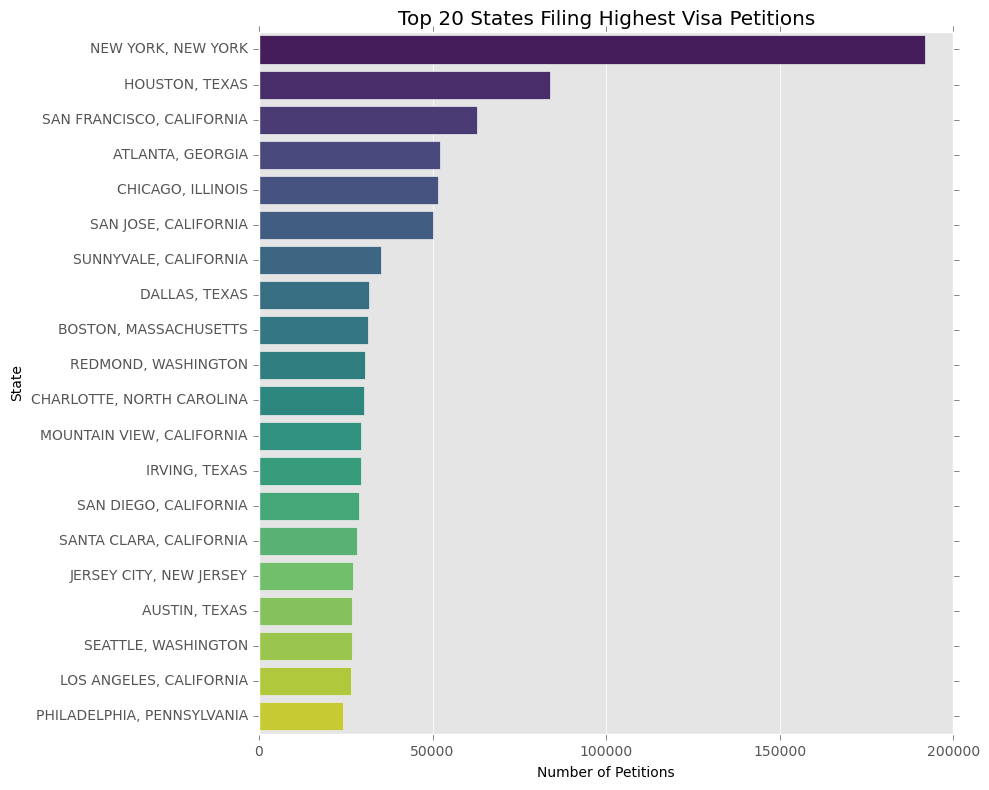

In [122]:
top_states_petitions = df['WORKSITE'].value_counts().nlargest(20)

plt.figure(figsize=(10, 8), dpi=100)
barplot = sns.barplot(x=top_states_petitions.values, y=top_states_petitions.index, orient='h', palette='viridis')
plt.title("Top 20 States Filing Highest Visa Petitions")
plt.xlabel("Number of Petitions")
plt.ylabel("State")


plt.tight_layout()
plt.show()


### Petition distribution by year

In [133]:
petition_by_year = df.groupby(['YEAR','CASE_STATUS']).size().reset_index(name='COUNT').sort_values('YEAR')
petition_by_year

,YEAR,CASE_STATUS,COUNT
0,2011.0,CERTIFIED,307936
1,2011.0,CERTIFIED-WITHDRAWN,11596
2,2011.0,DENIED,29130
3,2011.0,WITHDRAWN,10105
4,2012.0,CERTIFIED,352668
5,2012.0,CERTIFIED-WITHDRAWN,31118
6,2012.0,DENIED,21096
7,2012.0,WITHDRAWN,10725
8,2013.0,CERTIFIED,382951
9,2013.0,CERTIFIED-WITHDRAWN,35432


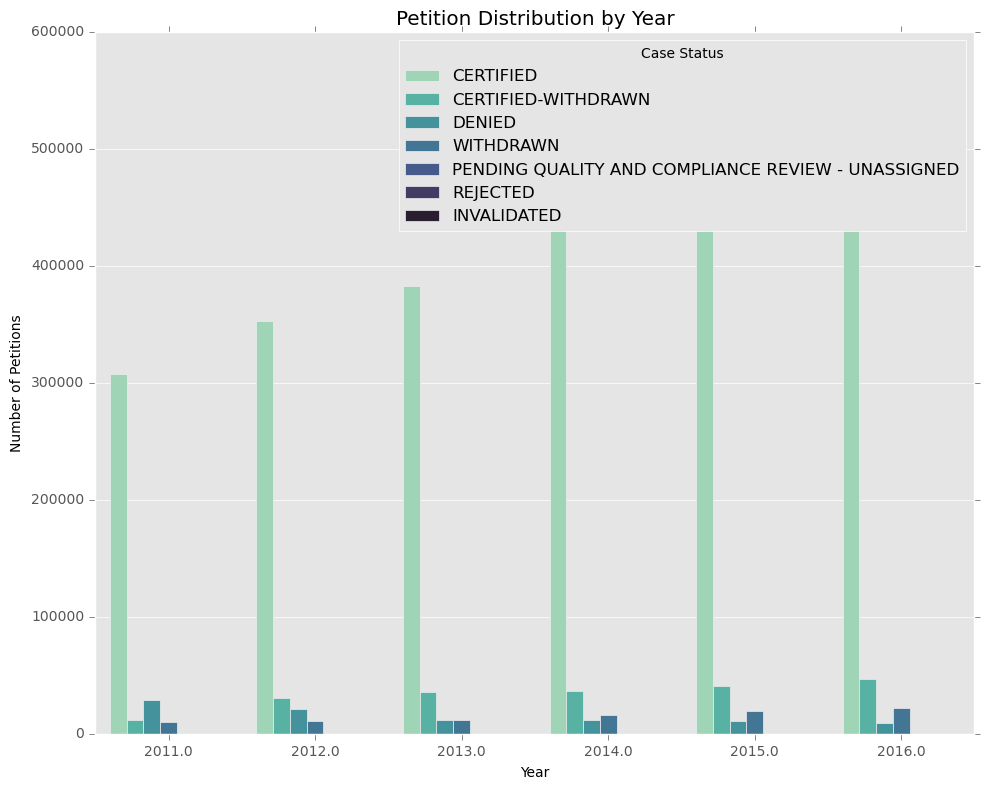

In [138]:

plt.figure(figsize=(10, 8), dpi=100)
barplot = sns.barplot(data=petition_by_year,x='YEAR',y='COUNT', hue= 'CASE_STATUS',palette='mako_r')
plt.title("Petition Distribution by Year")
plt.ylabel("Number of Petitions")
plt.xlabel("Year")

plt.legend(title='Case Status',loc='upper right')
plt.tight_layout()
plt.show()

### Number of visa petitions denied


In [140]:
num_petitions_denied = df[df['CASE_STATUS'] == 'DENIED'].shape[0]
num_petitions_denied

94346

### Rate of visas denied from last 5 years

In [144]:
last_5_years = df[df['YEAR'] >= df['YEAR'].max()-5]
total_petitions = last_5_years['YEAR'].value_counts()
denied_petitions = last_5_years[last_5_years['CASE_STATUS']=='DENIED']['YEAR'].value_counts()
rate = (denied_petitions / total_petitions)*100
print(rate)

2011.0    8.119476
2012.0    5.075949
2013.0    2.742732
2014.0    2.290159
2015.0    1.765399
2016.0    1.416326
Name: YEAR, dtype: float64


### Number of visa petitions filed by states

In [147]:
petitions_by_state = df['WORKSITE'].apply(lambda x: x.split(",")[-1].strip()).value_counts()
print(petitions_by_state)

CALIFORNIA              559942
TEXAS                   294455
NEW YORK                291412
NEW JERSEY              214078
ILLINOIS                160814
MASSACHUSETTS           116466
PENNSYLVANIA            109960
FLORIDA                 105773
GEORGIA                 103168
WASHINGTON              102801
VIRGINIA                 90028
MICHIGAN                 82964
NORTH CAROLINA           79672
OHIO                     76575
MARYLAND                 56257
CONNECTICUT              50253
MINNESOTA                48686
ARIZONA                  42054
MISSOURI                 34813
WISCONSIN                32672
COLORADO                 32038
INDIANA                  30516
TENNESSEE                27673
OREGON                   23790
DISTRICT OF COLUMBIA     22708
DELAWARE                 18138
IOWA                     16743
ARKANSAS                 14762
KANSAS                   13782
UTAH                     13107
SOUTH CAROLINA           12932
KENTUCKY                 12702
RHODE IS

### Rate of denial of visa petition by the states

In [152]:

df['temp'] = df['WORKSITE'].apply(lambda x: x.split(",")[-1].strip())

# Count the total number of visa petitions for each state
total_petitions_by_state = df['temp'].value_counts()

# Count the number of denied visa petitions for each state
denied_petitions_by_state = df[df['CASE_STATUS'] == 'DENIED']['temp'].value_counts()

# Calculate the rate of denial for each state
denial_rate_by_state = (denied_petitions_by_state / total_petitions_by_state) * 100

# Drop the temporary column
df.drop('temp', axis=1, inplace=True)

print(denial_rate_by_state)


ALABAMA                  5.091193
ALASKA                  11.318052
ARIZONA                  2.751225
ARKANSAS                 2.255792
CALIFORNIA               3.168185
COLORADO                 3.567638
CONNECTICUT              2.459555
DELAWARE                 2.023376
DISTRICT OF COLUMBIA     5.205214
FLORIDA                  5.272612
GEORGIA                  2.671371
HAWAII                  10.394456
IDAHO                    4.628967
ILLINOIS                 2.453145
INDIANA                  2.726439
IOWA                     2.610046
KANSAS                   3.156291
KENTUCKY                 3.369548
LOUISIANA                5.304653
MAINE                    3.471159
MARYLAND                 3.741757
MASSACHUSETTS            3.115931
MICHIGAN                 2.699966
MINNESOTA                2.310726
MISSISSIPPI              6.510539
MISSOURI                 2.318100
MONTANA                  8.519270
NA                      20.227525
NEBRASKA                 3.035869
NEVADA        

### Top 25 job titles

In [154]:
job_titles = df['JOB_TITLE'].value_counts().head(25)
job_titles

PROGRAMMER ANALYST             249081
SOFTWARE ENGINEER              121307
COMPUTER PROGRAMMER             70570
SYSTEMS ANALYST                 61965
SOFTWARE DEVELOPER              42907
BUSINESS ANALYST                39681
COMPUTER SYSTEMS ANALYST        35086
TECHNOLOGY LEAD - US            28350
SENIOR SOFTWARE ENGINEER        27133
TECHNOLOGY ANALYST - US         26055
ASSISTANT PROFESSOR             25265
SENIOR CONSULTANT               24904
CONSULTANT                      23081
PHYSICAL THERAPIST              20207
PROJECT MANAGER                 20172
DATABASE ADMINISTRATOR          16665
ACCOUNTANT                      14048
COMPUTER PROGRAMMER ANALYST     13634
RESEARCH ASSOCIATE              13623
DEVELOPER                       12909
ASSOCIATE                       12502
ANALYST                         11751
LEAD ENGINEER                   11157
COMPUTER SYSTEMS ENGINEER       11090
SENIOR SOFTWARE DEVELOPER       10208
Name: JOB_TITLE, dtype: int64

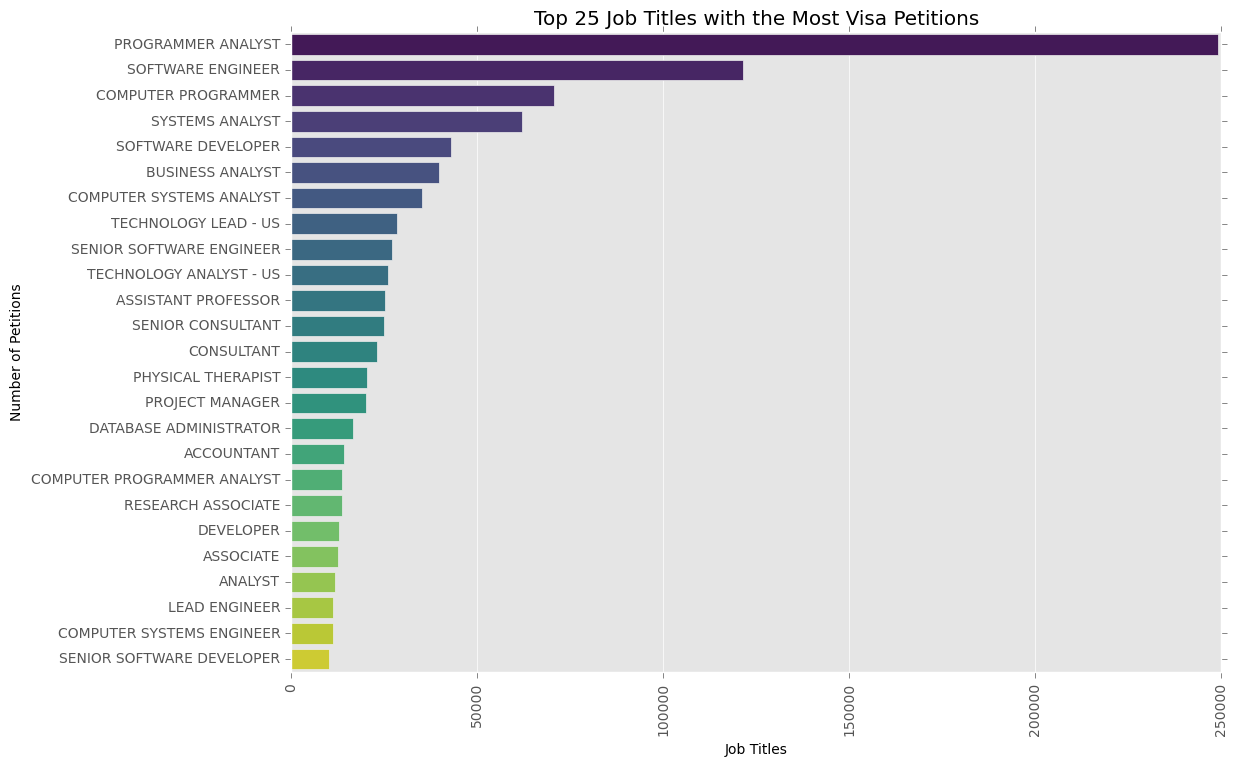

In [158]:
plt.figure(figsize=(12, 8), dpi=100)
barplot = sns.barplot(y=job_titles.index, x=job_titles.values, orient='h',palette='viridis')
plt.title("Top 25 Job Titles with the Most Visa Petitions")
plt.xlabel("Job Titles")
plt.ylabel("Number of Petitions")
plt.xticks(rotation=90)
plt.show()

###  Top 10 occupations with the highest wages


In [159]:
df.sort_values('PREVAILING_WAGE',ascending=False)[['SOC_NAME','JOB_TITLE']].head(10)

,SOC_NAME,JOB_TITLE
2163248,Physical Therapists,PHYSICAL THERAPISTS
2797982,Computer Programmers,SOFTWARE DEVELOPER
1673867,Statisticians,PROJECT MANAGER
1819718,"Software Developers, Applications",.NET DEVELOPER
2775906,Medical and Health Services Managers,PROGRAM MANAGER (POSITIVE PATHWAYS)
1547574,Computer Systems Analysts,PROGRAMMER/ANALYST
1668384,"Life Scientists, All Other",RESEARCH ASSOCIATE
1805875,Architectural and Engineering Managers,"MANAGER, SOFTWARE ENGINEERING"
2796071,Financial Managers,"MANAGING DIRECTOR, EQUITY DERIVATIVES"
1698325,"Internists, General",INTERNIST


### To analyse the fraction of full-time and part-time workers

In [160]:
full_time_count = df[df['FULL_TIME_POSITION'] == 'Y'].shape[0]
part_time_count = df[df['FULL_TIME_POSITION'] == 'N'].shape[0]
total_count = full_time_count + part_time_count

# Calculate the fraction of full-time and part-time workers
fraction_full_time = full_time_count / total_count
fraction_part_time = part_time_count / total_count

print("Fraction of Full-Time Workers:", fraction_full_time)
print("Fraction of Part-Time Workers:", fraction_part_time)


Fraction of Full-Time Workers: 0.8580056740177547
Fraction of Part-Time Workers: 0.1419943259822452


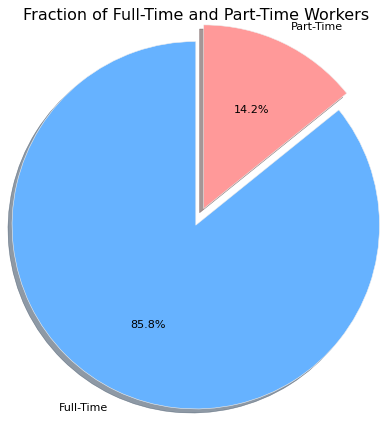

In [161]:
# Data for the pie chart
fractions = [fraction_full_time, fraction_part_time]
labels = ['Full-Time', 'Part-Time']
colors = ['#66B2FF', '#FF9999']
explode = [0.1, 0]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(fractions, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Fraction of Full-Time and Part-Time Workers')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie

plt.show()